<a href="https://colab.research.google.com/github/nurulzahrah/miniproject-DibimbingDSF36/blob/main/Mini_Project_Dibimbing_DSF36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CLASSIFICATION SPESIES IRIS**

Informasi Atribut :
*   panjang daun ketapang dalam cm
*   lebar sepal dalam cm
*   panjang kelopak dalam cm
*   lebar kelopak dalam cm


kelas:
1.   Iris Setosa = 0
2.   Iris-Versiwarna = 1
3.   Iris Virginia = 2


# **1. Load Data**

Sebelum memuat data, langkah pertama adalah mengimpor library yang disediakan oleh Python, seperti pandas, scikit-learn, matplotlib, dan seaborn. Library ini digunakan untuk mengolah data, membuat model machine learning, serta melakukan visualisasi.

In [45]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Iris diambil dari scikit-learn, yang sudah terstruktur dengan baik dan tidak memerlukan proses data cleansing karena dataset ini bersih, tidak memiliki nilai yang hilang (missing values), serta sudah terlabel dengan benar.
Dataset ini kemudian dibagi menjadi data latih (training set) dan data uji (test set). Pembagian ini bertujuan untuk melatih model menggunakan data latih dan menguji performa model menggunakan data uji guna menghindari overfitting serta memastikan model dapat bekerja dengan baik pada data yang belum pernah dilihat sebelumnya

In [46]:
# Memuat dataset Wine dari scikit-learn
iris = datasets.load_iris()

X = iris.data    # inputan untuk machine learning
y = iris.target  # output yang dinginkan dari machine learning

# Mengonversi data fitur dan target menjadi DataFrame
df_x = pd.DataFrame(X, columns=iris.feature_names)
df_y = pd.Series(y, name='target')

In [47]:
df_x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [48]:
df_y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [49]:
# Gabungkan fitur dan target dalam satu DataFrame
df = pd.concat([df_x, df_y], axis=1)

df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [51]:
df['target'].unique()

array([0, 1, 2])

In [52]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [53]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [54]:
# mengecek apakah ada duplikat data

print(df.shape)
print("jumlah data yang duplikat", df.duplicated().sum())
df[df.duplicated() == True].head()
# Perhatikan kalau sebelumnya kita tidak "Drop" var observasi,
# maka kita tidak akan mendapatkan duplikasi dengan cara ini.

(150, 5)
jumlah data yang duplikat 1


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
142,5.8,2.7,5.1,1.9,2


In [55]:
df = df.drop_duplicates()

In [56]:
# mengecek apakah ada duplikat data

print(df.shape)
print("jumlah data yang duplikat", df.duplicated().sum())
df[df.duplicated() == True].head()
# Perhatikan kalau sebelumnya kita tidak "Drop" var observasi,
# maka kita tidak akan mendapatkan duplikasi dengan cara ini.

(149, 5)
jumlah data yang duplikat 0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target


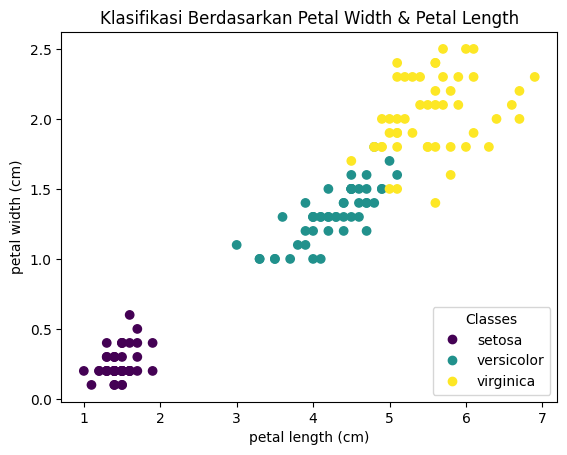

In [57]:
# Buat scatter plot dengan Petal Length (kolom ke-2) dan Petal Width (kolom ke-3)
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)

# Ganti label sumbu dengan fitur yang sesuai
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])

# Tambahkan legend
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

# Tampilkan plot
plt.title("Klasifikasi Berdasarkan Petal Width & Petal Length")
plt.show()


In [58]:
# pengelompokkan iris berdasarkan petal length dan petal width
# Petal Length & Petal Width memberikan batasan pemisahan yang jauh lebih akurat dibandingkan Sepal!

def classify_iris(petal_length, petal_width):
    if petal_length <= 2.0 and petal_width <= 0.6:
        return "Setosa"
    elif 3.0 <= petal_length <= 5.1 and petal_width <= 1.8:
        return "Versicolor"
    elif petal_length >= 4.5 and petal_width >= 1.4:
        return "Virginica"
    else:
        return "Tidak dapat diklasifikasikan"

# Contoh penggunaan:
print(classify_iris(1.4, 0.2))  # Output: Setosa
print(classify_iris(4.5, 1.5))  # Output: Versicolor
print(classify_iris(6.0, 2.0))  # Output: Virginica


Setosa
Versicolor
Virginica


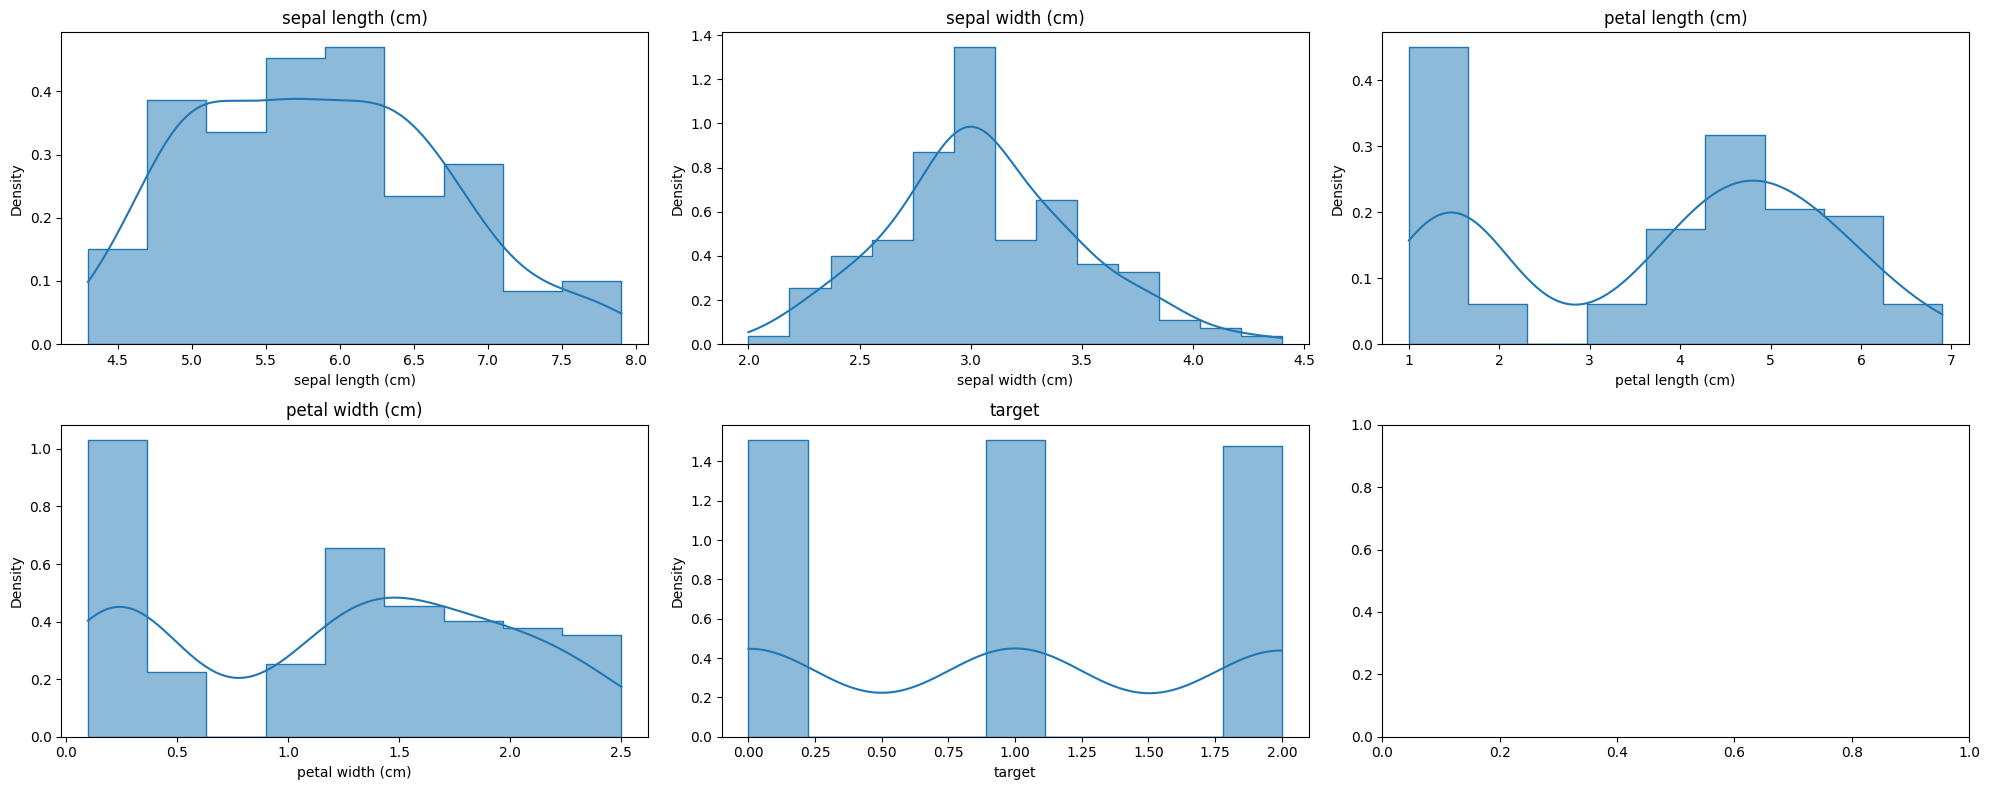

In [59]:
# visualisasi setiap variabel numerik pada data

# Membuat grid histogram dengan Seaborn
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# Menggunakan Seaborn untuk membuat histogram dalam grid
for i in range(len(df.columns)):
    row, col = divmod(i, 3)
    sns.histplot(df.iloc[:, i], kde=True, ax=axes[row, col], element="step", stat="density", common_norm=False)
    axes[row, col].set_title(df.columns[i])

# Mengatur layout
plt.tight_layout()
plt.show()

Box Plot: Box plot memberikan informasi tentang variabilitas dan penyebaran data dalam bentuk kotak. Garis tengah mewakili nilai median dan dengan kuartil pertama dan ketiga di kedua ujung sisinya. Nilai Minimum dan Maksimum diwakili oleh garis di kedua sisi kotak.

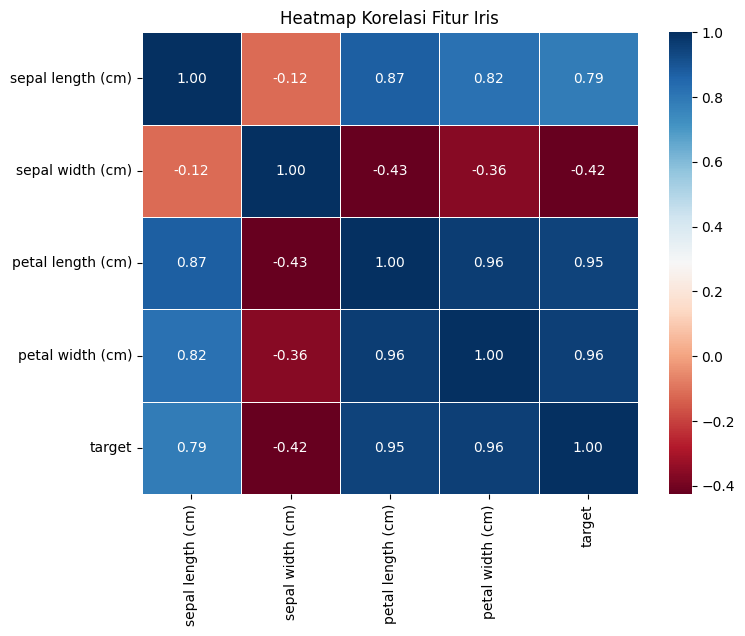

In [60]:
# Hitung matriks korelasi
correlation_matrix = df.corr()

# Buat heatmap dengan warna biru (positif) dan merah (negatif atau lemah)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu", fmt=".2f", linewidths=0.5)

# Judul
plt.title("Heatmap Korelasi Fitur Iris")
plt.show()


*   petal length dan petal width (0.96) : memiliki nilai yang sangat tinggi, artinya kedua variabel tersebut memiliki korelasi yang kuat, yang dimana Jika Petal Length bertambah/memiliki nilai tinggi, maka Petal Width juga bertambah/memiliki nilai tinggi.
*   petal length dan sepal width (-0.43) : memiliki nilai yang rendah, artinya kedua variabel tersebut tidak memiliki korelasi yang kuat dalam mengelompokkan jenis tanaman iris, yang dimana jika nilai sepal width tingi, maka petal length belum tentu nilai nya tinggi, begitupun sebaliknya.


# **2. Split Data**

In [61]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

# **3. Train The Model**

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Algoritma Random Forest

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **4. Predict & Evaluate**

In [63]:
# Menghitung balance/imbalance pada data uji

df_y.value_counts(normalize=True)
df_y.value_counts()

,count
target,
0,50
1,50
2,50


In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 4. Memprediksi dan mengevaluasi
y_pred = model_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Laporan Klasifikasi:")
print(f"Akurasi: {accuracy * 100:.2f}%")

Laporan Klasifikasi:
Akurasi: 100.00%


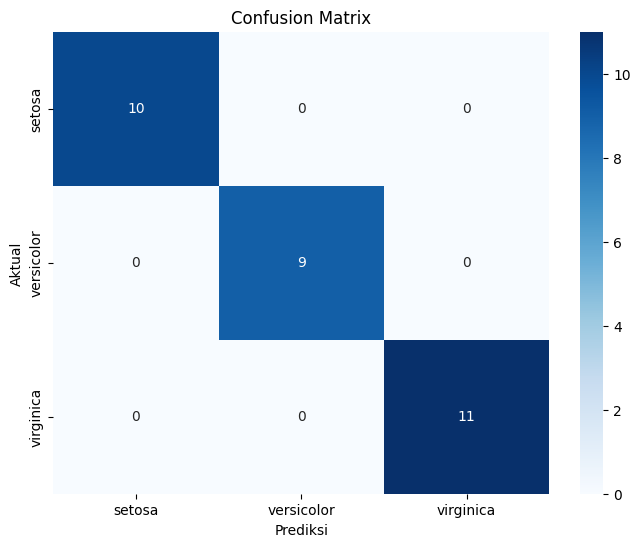

In [65]:
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

Berdasarkan confusion matrix tersebut, disimpulkan bahwa :
10 sampel sebenarnya setosa, dan semua diprediksi benar sebagai setosa.
9 sampel sebenarnya versicolor, dan semua diprediksi benar sebagai versicolor.
11 sampel sebenarnya virginica, dan semua diprediksi benar sebagai virginica.

Confusion matrix ini hanya menunjukkan hasil prediksi pada data uji saja, bukan seluruh dataset. Jadi, confusion matrix ini hanya menampilkan 20% sampel dari data uji, yang terbagi ke dalam 10 sampel Setosa, 9 sampel Versicolor, dan 11 sampel Virginica.

In [66]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [67]:
from sklearn.metrics import accuracy_score, classification_report

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan hasil evaluasi lengkap
print(f"Akurasi Model: {accuracy * 100:.2f}%\n")
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Akurasi Model: 100.00%

Laporan Klasifikasi:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



NB :
*   Accuracy adalah ukuran seberapa baik model dalam mengklasifikasikan data dengan benar.
*   Precision → Dari semua prediksi kelas tersebut, berapa yang benar?
Precision → Dari semua prediksi kelas tersebut, berapa yang benar?
*   Recall → Dari semua data kelas tersebut, berapa yang terdeteksi dengan benar?
*   F1-score → Rata-rata harmonis antara Precision & Recall (semakin tinggi, semakin baik).
*   Support → Jumlah sampel dalam data uji untuk setiap kelas.

Berdasarkan hasil evaluasi model Random Forest, dapat disimpulkan bahwa nilai accuracy, precision, recall, dan F1-score untuk setiap jenis Setosa, Versicolor, dan Virginica mencapai 100%. Hal ini menunjukkan bahwa model mampu mengklasifikasikan setiap sampel dengan sempurna, tanpa kesalahan prediksi.
